#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
np.set_printoptions(suppress=True)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading the Dataset

In [4]:
data = pd.read_csv('Social_Network_Ads.csv')

In [5]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,19598943,Male,35,134000,1
1,15694829,Female,32,150000,1
2,15735878,Male,52,150000,1
3,15675949,Female,33,149000,1
4,15701537,Male,42,149000,1


Removing the unnecessary `USER ID` column

In [6]:
data.drop('User ID', axis=1, inplace=True)

In [7]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,35,134000,1
1,Female,32,150000,1
2,Male,52,150000,1
3,Female,33,149000,1
4,Male,42,149000,1


#### Visualizing the Dataset

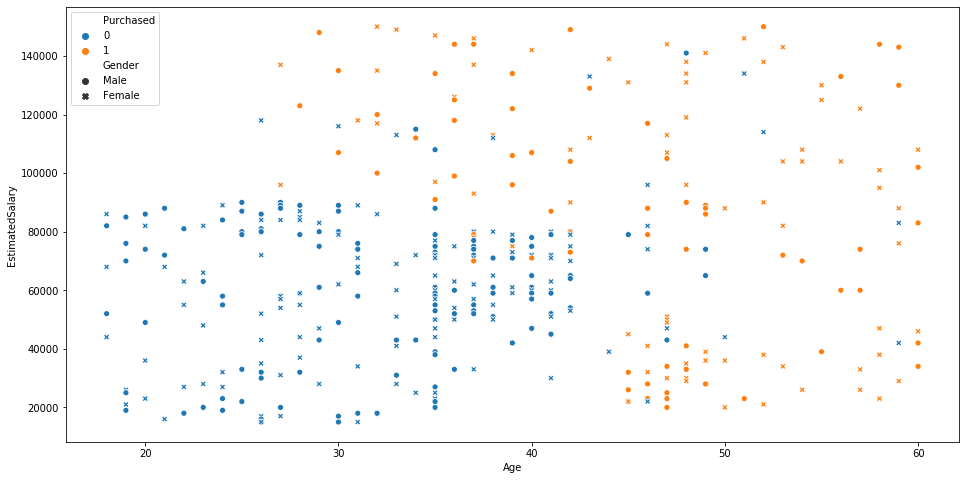

In [8]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='Age', y='EstimatedSalary', data=data, hue='Purchased', style='Gender')
plt.show()

#### Splitting the Independent and Dependent Variables

In [9]:
X = data.loc[:,['Age', 'EstimatedSalary']]
y = data.loc[:, 'Purchased']

In [10]:
y.shape

(401,)

#### Splitting the dataset into Training and Testing

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

In [13]:
X_test.shape

(101, 2)

#### Feature Scaling

The values in the Independent Variables need to be Scaled. This is the current box-plot

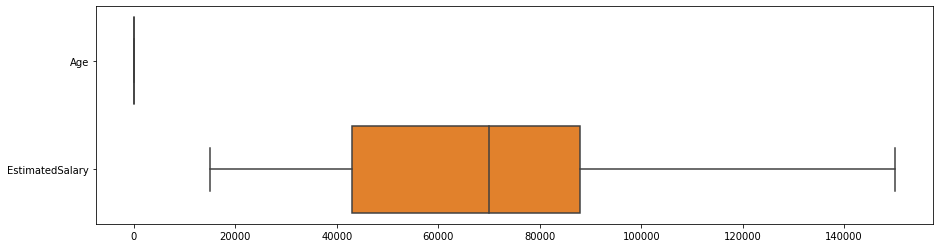

In [14]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=X, orient='h')
plt.show()

Lets do Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
my_scaler = StandardScaler()

Before `feature-scaling`, the Independent Variables look like this:

In [17]:
X_train.head()  # Top 5 rows

,Age,EstimatedSalary
44,31,118000
117,29,83000
195,40,71000
151,37,78000
61,42,108000


In [18]:
X_train_scaled = my_scaler.fit_transform(X_train)  # Scaling the X_train data

In [19]:
X_test_scaled = my_scaler.transform(X_test)        # Scaling the X_test data

After `feature-scaling`, the Independent Variables look like this:

In [20]:
X_train_scaled[:5]  # First 5 rows

array([[-0.64101536,  1.41205834],
       [-0.83506643,  0.39009718],
       [ 0.23221444,  0.03971049],
       [-0.05886216,  0.24410272],
       [ 0.42626551,  1.12006943]])

Now that the columns are scaled, lets see how they compare with each other using a Boxplot

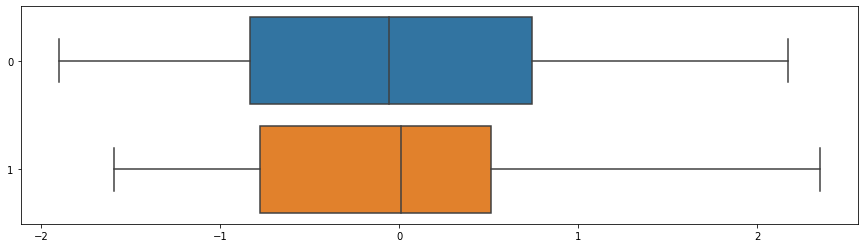

In [21]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=X_train_scaled, orient='h')
plt.show()

Both columns see to be in the same range now!

### Classification using `K-Nearest Neighbour`

#### Building the Model

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
classifier = KNeighborsClassifier(n_neighbors=3)

#### Training the model

In [24]:
classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

#### Finding predictions on the Test Set

In [25]:
y_pred = classifier.predict(X_test_scaled)

In [26]:
y_pred   # Predicted Answers

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [27]:
y_test.values  # Real Answers

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

#### Evaluation of the model performance using Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score 

In [29]:
cm = confusion_matrix(y_test, y_pred)

In [30]:
cm

array([[58,  7],
       [ 2, 34]], dtype=int64)

#### Portraying the Confusion Matrix using a Heatmap

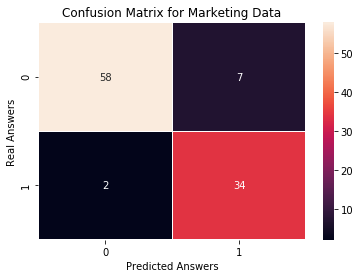

In [31]:
sns.heatmap(cm, annot=True, linewidth=0.1)
plt.xlabel('Predicted Answers')
plt.ylabel('Real Answers')
plt.title('Confusion Matrix for Marketing Data')
plt.show()

#### Finding Accuracy

##### Method 1

In [32]:
correct_answers = cm.diagonal().sum()

In [33]:
total_questions = cm.sum()

In [34]:
accuracy = correct_answers/total_questions * 100

In [35]:
round(accuracy, 3)

91.089

##### Method 2

In [36]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9108910891089109

### Can this model be improved further?
Lets tune the Hyper-Parameters of this model

This is our current model

In [37]:
classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [38]:
number_of_neighbours = [1, 3, 5, 7, 9, 11, 13, 15]
accuracies = []

for k in number_of_neighbours:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

Lets see the accuracies

In [39]:
accuracies

[0.8514851485148515,
 0.9108910891089109,
 0.900990099009901,
 0.9108910891089109,
 0.9108910891089109,
 0.9207920792079208,
 0.9207920792079208,
 0.900990099009901]

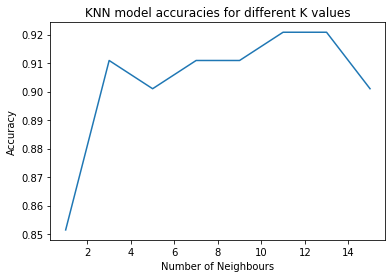

In [40]:
plt.plot(number_of_neighbours, accuracies)
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.title('KNN model accuracies for different K values')
plt.show()

As we can see in the above plot, the model achieves highest accuracy for `k=11`. Therefore, we will make a final KNN model with k=11

In [41]:
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

The name of our final model is `classifier`

### How to make predictions using the Model

#### Question 1
_We want to know whether two persons Raunak and Ria; Raunak with Age 23 and Salary 90000, Ria with Age 26 and Salary 130000 will purchase our product or not._

In [42]:
raunak = np.array([23, 90000])
ria = np.array([26, 130000])

In [43]:
questions = np.array([raunak, ria])

In [44]:
questions

array([[    23,  90000],
       [    26, 130000]])

In [45]:
questions_scaled = my_scaler.transform(questions)

In [46]:
predictions = classifier.predict(questions_scaled)

In [47]:
print(predictions)

[0 1]


#### Question 2  
_Read the `my_questions.csv` file and make predictions for each row_

In [48]:
original_questions = pd.read_csv('my_questions.csv')
original_questions

,Age,Salary
0,34,150000
1,56,30000
2,60,180000
3,24,70000


In [49]:
questions = original_questions.values  # Converting the DataFrame into a Numpy array

In [50]:
questions_scaled = my_scaler.transform(questions)

In [51]:
questions_scaled

array([[-0.34993876,  2.34642283],
       [ 1.78462298, -1.15744401],
       [ 2.17272511,  3.22238954],
       [-1.32019409,  0.0105116 ]])

In [52]:
predictions = classifier.predict(questions_scaled)

In [53]:
predictions

array([1, 1, 1, 0], dtype=int64)

Lets create a new column to store the predictions that we just found

In [54]:
original_questions['Predictions'] = predictions

In [55]:
original_questions

,Age,Salary,Predictions
0,34,150000,1
1,56,30000,1
2,60,180000,1
3,24,70000,0
